In [14]:
import numpy as np
import pandas as pd
import seaborn as sns


In [15]:
#Read in whales data
whale_df = pd.read_csv("data/whales.csv")
whale_df.dtypes

#Turn Date into datetime:
whale_df['timestamp'] = pd.to_datetime(whale_df.timestamp)
# whale_df.dtypes


In [16]:
whale_df["individual-local-identifier"].unique()

array(['1993CA-Bmu-00834', '1993CA-Bmu-10823', '1993CA-Bmu-10833',
       '1993CA-Bmu-10836', '1994CA-Bmu-00848', '1994CA-Bmu-10820',
       '1994CA-Bmu-10821', '1994CA-Bmu-10822', '1994CA-Bmu-10823',
       '1994CA-Bmu-10824', '1994CA-Bmu-10828', '1994CA-Bmu-10829',
       '1994CA-Bmu-23029', '1995CA-Bmu-00837', '1995CA-Bmu-00841',
       '1995CA-Bmu-00845', '1995CA-Bmu-02082', '1995CA-Bmu-02083',
       '1995CA-Bmu-04172', '1995CA-Bmu-04173', '1995CA-Bmu-04176',
       '1995CA-Bmu-23031', '1995CA-Bmu-23037', '1995CA-Bmu-23040',
       '1995CA-Bmu-23041', '1995CA-Bmu-23042', '1995CA-Bmu-23043',
       '1998CA-Bmu-00823', '1998CA-Bmu-00824', '1998CA-Bmu-00826',
       '1998CA-Bmu-00827', '1998CA-Bmu-00833', '1998CA-Bmu-01390',
       '1998CA-Bmu-04174', '1998CA-Bmu-04175', '1998CA-Bmu-10823',
       '1999CA-Bmu-00830', '1999CA-Bmu-00832', '1999CA-Bmu-00834',
       '1999CA-Bmu-00837', '1999CA-Bmu-00838', '1999CA-Bmu-00845',
       '1999CA-Bmu-00849', '1999CA-Bmu-01388', '1999CA-Bmu-020

In [17]:
whale_df.head()

,event-id,visible,timestamp,location-long,location-lat,argos:best-level,argos:calcul-freq,argos:iq,argos:lat1,argos:lat2,...,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name,utm-easting,utm-northing,utm-zone,study-timezone,study-local-timestamp
0,18347727173,True,1993-08-29 01:23:17,-122.407,36.981,-126.0,4.016497e+08,NaN,36.981,47.285,...,argos-doppler-shift,Balaenoptera musculus,1993CA-ST6-00834,1993CA-Bmu-00834,Blue whales Eastern North Pacific 1993-2008 - ...,552776.196100,4.092929e+06,10N,GMT-08:00,1993-08-28 17:23:17.000
1,18347727174,True,1993-08-31 13:04:34,-122.788,37.637,-126.0,6.496602e+05,NaN,37.637,39.596,...,argos-doppler-shift,Balaenoptera musculus,1993CA-ST6-00834,1993CA-Bmu-00834,Blue whales Eastern North Pacific 1993-2008 - ...,518704.417218,4.165562e+06,10N,GMT-08:00,1993-08-31 05:04:34.000
2,18347727175,True,1993-09-01 01:57:39,-122.827,37.166,-129.0,6.496602e+05,NaN,37.166,44.267,...,argos-doppler-shift,Balaenoptera musculus,1993CA-ST6-00834,1993CA-Bmu-00834,Blue whales Eastern North Pacific 1993-2008 - ...,515359.338875,4.113302e+06,10N,GMT-08:00,1993-08-31 17:57:39.000
3,18347727176,False,1993-09-05 13:41:06,-122.747,38.231,-129.0,6.496602e+05,NaN,38.231,43.953,...,argos-doppler-shift,Balaenoptera musculus,1993CA-ST6-00834,1993CA-Bmu-00834,Blue whales Eastern North Pacific 1993-2008 - ...,522142.883405,4.231476e+06,10N,GMT-08:00,1993-09-05 05:41:06.000
4,18347727177,False,1993-08-30 15:03:19,-122.242,37.687,-133.0,6.494532e+05,NaN,37.687,31.315,...,argos-doppler-shift,Balaenoptera musculus,1993CA-ST6-10823,1993CA-Bmu-10823,Blue whales Eastern North Pacific 1993-2008 - ...,566832.732156,4.171358e+06,10N,GMT-08:00,1993-08-30 07:03:19.000


In [18]:
whale_df.columns

Index(['event-id', 'visible', 'timestamp', 'location-long', 'location-lat',
       'argos:best-level', 'argos:calcul-freq', 'argos:iq', 'argos:lat1',
       'argos:lat2', 'argos:lc', 'argos:lon1', 'argos:lon2', 'argos:nb-mes',
       'argos:nb-mes-120', 'manually-marked-outlier', 'sensor-type',
       'individual-taxon-canonical-name', 'tag-local-identifier',
       'individual-local-identifier', 'study-name', 'utm-easting',
       'utm-northing', 'utm-zone', 'study-timezone', 'study-local-timestamp'],
      dtype='object')

<Axes: xlabel='location-long', ylabel='location-lat'>

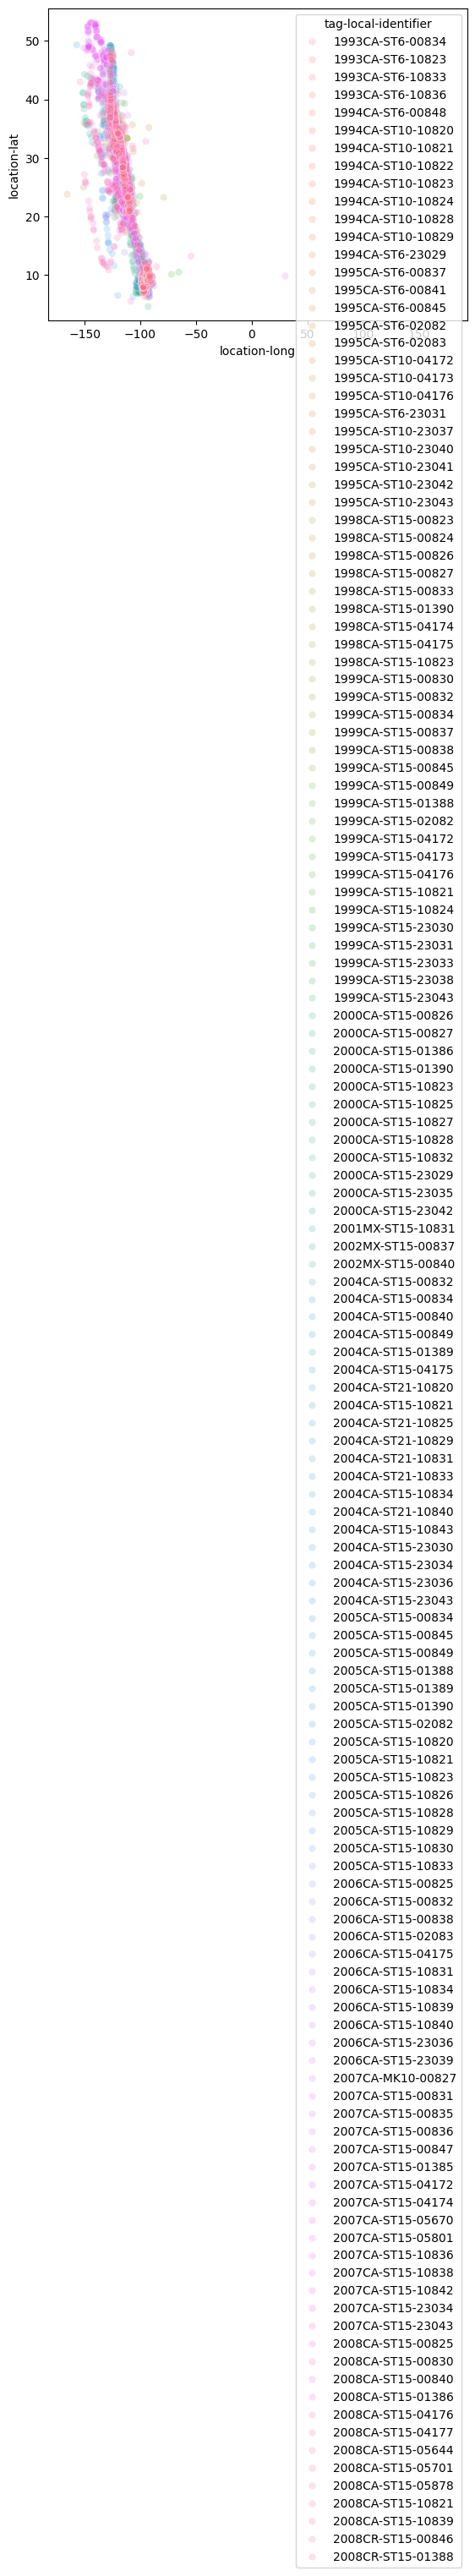

In [24]:
sns.scatterplot(data=whale_df, x="location-long", y="location-lat", hue="tag-local-identifier", alpha=.2)